In [ ]:
# Start by installing dependencies
%pip install matplotlib numpy networkx

## 3D Bar Charts

Inspired by this cool [physical LEGO chart](https://elsieleerobbins.com/LEGOcompetition.html), we can make 3D bar charts with matplotlib!

<img src="https://seeinglogic.com/posts/python-3d-intro/lego_dataviz.jpg" width="600" height="424">

In [14]:

import matplotlib.pyplot as plt
import numpy as np


def plot_3d_bar_chart(title, rows_data, column_names, colors):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Generate grid for row and column positions
    _x = np.arange(len(column_names))
    _y = np.arange(len(rows_data))
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()
    
    # Flatten the Z values and calculate bottom
    top = np.array([value for values in rows_data.values() for value in values])
    bottom = np.zeros_like(top)
    width = 1
    depth = 0.5 # make room between rows
    
    # Plot bars
    for i in range(len(x)):
        row_index = int(y[i])
        color = colors[row_index]

        # Don't draw a bar if the value is zero
        if top[i] == 0:
            continue

        ax.bar3d(x[i], y[i], bottom[i], width, depth, top[i], color=color, shade=True)

    # Set row and column labels
    ax.set_xticks(_x + width / 2)
    ax.set_xticklabels(column_names)
    ax.set_yticks(_y + depth / 2)
    ax.set_yticklabels(rows_data.keys())
    
    # rotate the camera to a good starting spot
    ax.view_init(azim=220)
    ax.set_title(title)
    plt.show()


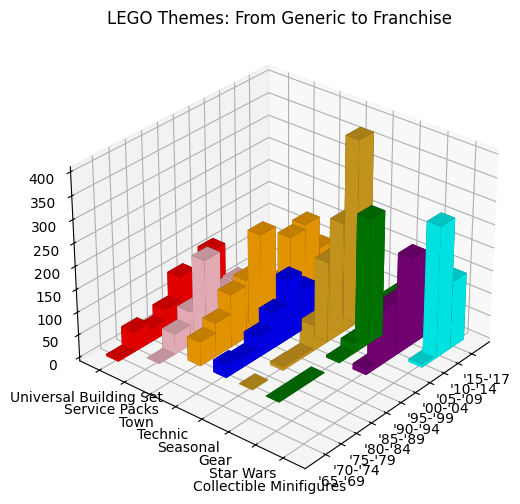

In [15]:

title = 'LEGO Themes: From Generic to Franchise'
column_names = [
    "'65-'69",
    "'70-'74",
    "'75-'79",
    "'80-'84",
    "'85-'89",
    "'90-'94",
    "'95-'99",
    "'00-'04",
    "'05-'09",
    "'10-'14",
    "'15-'17",
]
lego_colors = [
    'red',
    'pink',
    'orange',
    'blue',
    'goldenrod',
    'green',
    'purple',
    'cyan',
]

# Reordered to make the graph match the original
lego_colors = lego_colors[::-1]
lego_data_rows = {
    'Collectible Minifigures': [0, 0, 0, 0, 0, 0, 0, 0, 6, 287, 148],
    'Star Wars': [0, 0, 0, 0, 0, 0, 13, 120, 117, 195, 157],
    'Gear': [0, 0, 1, 1, 1, 0, 5, 22, 275, 62, 66],
    'Seasonal': [0, 0, 2, 0, 7, 6, 58, 176, 242, 402, 30],
    'Technic': [0, 0, 28, 22, 48, 80, 132, 91, 40, 56, 36],
    'Town': [0, 0, 53, 74, 116, 128, 208, 80, 164, 173, 102],
    'Service Packs': [0, 1, 45, 74, 167, 78, 82, 4, 0, 3, 0],
    'Universal Building Set': [4, 45, 29, 53, 106, 65, 124, 15, 0, 0, 0],
}

plot_3d_bar_chart(title, lego_data_rows, column_names, lego_colors)

## Network Graphs

There are certain kinds of network graphs that work best in 3D because they show some sort of shape or trend.

This one doesn't doesn't really fit that mold, but shows how to do it if you have data that looks better in 3D.

For example, you could try altering the color map so it makes a gradient as you go low-to-high values in one axis.

In [19]:

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


def show_3d_graph(G: nx.Graph, hide_axes: bool = False):
    # Use nx to do a 3d-layout
    graph_seed = 4
    pos = nx.spring_layout(G, dim=3, k=0.5, seed=graph_seed) # k regulates the distance between nodes

    # Calculate the Euclidean distance of each node from the origin
    distances = np.array([np.sqrt(x**2 + y**2 + z**2) for x, y, z in pos.values()])

    # Scale the distances to lie between 0 and 1 for color mapping
    distance_colors = distances / max(distances)

    # Plot the graph in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if hide_axes:
        ax.set_axis_off()

    # Plot nodes with color scaled by distance from the origin and size scaled by degree
    x = np.array([pos[v][0] for v in G])
    y = np.array([pos[v][1] for v in G])
    z = np.array([pos[v][2] for v in G])

    ax.scatter(x, y, z, c=distance_colors, cmap='viridis', s=100)  # Color nodes based on distance

    # Plot edges
    for edge in G.edges():
        x = np.array([pos[edge[0]][0], pos[edge[1]][0]])
        y = np.array([pos[edge[0]][1], pos[edge[1]][1]])
        z = np.array([pos[edge[0]][2], pos[edge[1]][2]])
        ax.plot(x, y, z, c="tab:gray")

    plt.show()


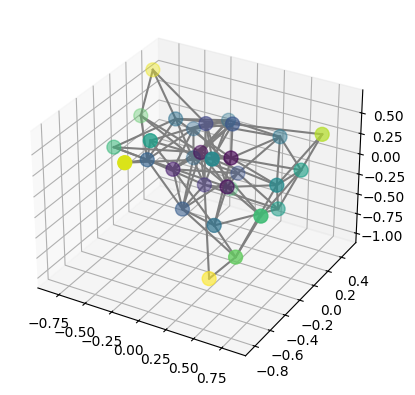

In [23]:

# Chosen by random dice roll
seed = 4

# Generate a random graph
g = nx.erdos_renyi_graph(n=30, p=0.2, seed=seed)

show_3d_graph(g)


## Icosahedron

You can even build basic 3D shapes in matplotlib, like the regular icosahedron below.

It's pretty easy to play around with how the color, opacity, and camera angle to change the appearance of the shape.

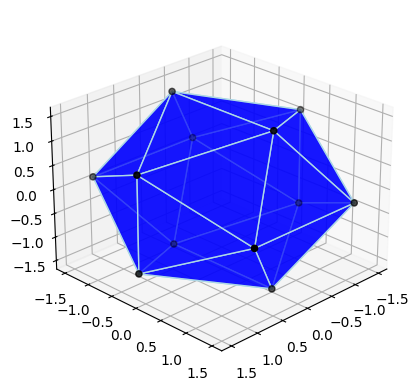

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Golden ratio
phi = (1 + np.sqrt(5)) / 2

# Vertices of a regular icosahedron
vertices = np.array([
    [-1, phi, 0],
    [1, phi, 0],
    [-1, -phi, 0],
    [1, -phi, 0],
    [0, -1, phi],
    [0, 1, phi],
    [0, -1, -phi],
    [0, 1, -phi],
    [phi, 0, -1],
    [phi, 0, 1],
    [-phi, 0, -1],
    [-phi, 0, 1]
])

# Faces of the icosahedron
faces = [
    [0, 11, 5], [0, 5, 1], [0, 1, 7], [0, 7, 10], [0, 10, 11],
    [1, 5, 9], [5, 11, 4], [11, 10, 2], [10, 7, 6], [7, 1, 8],
    [3, 9, 4], [3, 4, 2], [3, 2, 6], [3, 6, 8], [3, 8, 9],
    [4, 9, 5], [2, 4, 11], [6, 2, 10], [8, 6, 7], [9, 8, 1]
]

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the faces
poly3d = [[[vertices[index] for index in face] for face in faces]]
ax.add_collection3d(Poly3DCollection(poly3d[0], facecolors='blue', linewidths=1, edgecolors='lightblue', alpha=0.7))

# Plot the vertices
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='black')

# Ensure the axes are scaled equally to prevent distortion
max_radius = np.max(np.abs(vertices))
ax.set_xlim([-max_radius, max_radius])
ax.set_ylim([-max_radius, max_radius])
ax.set_zlim([-max_radius, max_radius])
ax.set_aspect('auto')

# Adjust the position of the camera
ax.view_init(elev=25, azim=45)

plt.show()